In [1]:
import rioxarray as rxr
from hydrocivil.web import OpenTopo

In [2]:
# Download function for opentopo (API KEY needed)
OpenTopo?

Signature: OpenTopo(DATASET, ROI, OUTPUTPATH, API_KEY='YOURKEY')
Docstring:
This function makes a request to the OpenTopo server and downloads
DEM data for a small region. 

Args:
    DATASET (str): Any of this:
        "SRTMGL3" (SRTM GL3 90m)
        "SRTMGL1" (SRTM GL1 30m)
        "SRTMGL1_E" (SRTM GL1 Ellipsoidal 30m)
        "AW3D30" (ALOS World 3D 30m)
        "AW3D30_E" (ALOS World 3D Ellipsoidal, 30m)
        "SRTM15Plus" (Global Bathymetry SRTM15+ V2.1 500m)
        "NASADEM" (NASADEM Global DEM)
        "COP30" (Copernicus Global DSM 30m)
        "COP90" (Copernicus Global DSM 90m)
        "EU_DTM" (DTM 30m)
        "GEDI_L3" (DTM 1000m)
        "GEBCOIceTopo" (Global Bathymetry 500m)
        "GEBCOSubIceTopo" (Global Bathymetry 500m)

    ROI (tuple): Tuple with coordinates (lonmin, lonmax, latmin, latmax)

    OUTPUTPATH (str): Path to the output file e.g "./blabla/dem.tif"

    API_KEY (str, optional): Your OpenTopo API Key.
        Check https://opentopography.org/develo

In [3]:
PATH_OPENTOPO_APIKEY = r'..\..\.opentopoapikey'

# Example download european data
regionofinterest = (-70.2, -70, -32.2, -32)
API_KEY = open(PATH_OPENTOPO_APIKEY).read()
response = OpenTopo(DATASET='COP30',
                    ROI=regionofinterest,
                    OUTPUTPATH='ESA_COP30.tif',
                    API_KEY=API_KEY)
print(response.status_code)

200


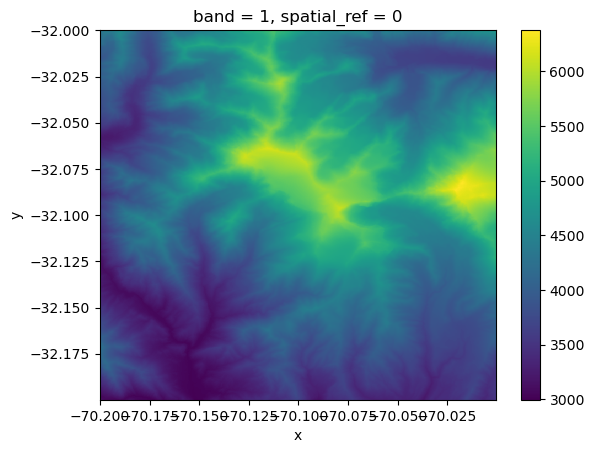

In [4]:
# Show downloaded elevation data
data = rxr.open_rasterio(r'data\ESA_COP30.tif', masked=True).squeeze()
data.plot.imshow()

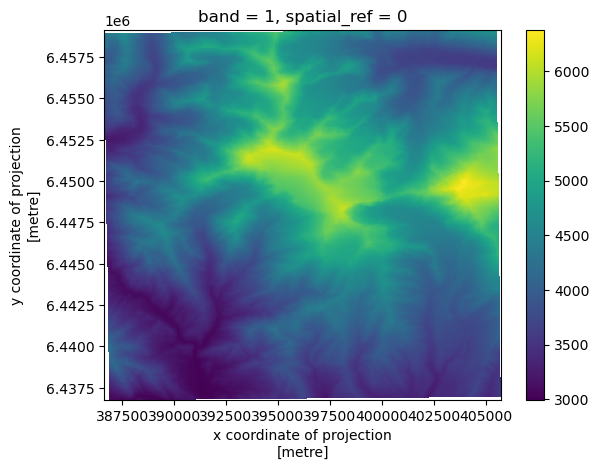

In [6]:
# Reproject to UTM 19S using rioxarray and show
data = data.rio.reproject('epsg:32719')
data = data.where(data<=1e30).rio.set_nodata(-9999)
data.plot.imshow()

# Save
data.rio.to_raster(r'data\ESA_COP30_UTM19S.tif')